# Case Study Project - Office Supplies

### DATA:
Column name and Details:
* Order ID:  Character. Unique identifier for the individual order.
* Order Date:  Character. Date of the order, in format YYYY-MM-DD.
* Ship Mode:  Character. The method used to send out the order.
* Region:  Character. The region the order was sent from.
* Product ID:  Character. Unique identifier of the product ordered.
* Category:  Character. Category of the product, one of ‘Office Supplies’,
‘Furniture’, or ‘Technology’.
* Sub-Category:  Character. Subcategory of the product (e.g. Binders, Paper,
etc.)
* Product Name:  Character. The name of the product.
* Sales:  Numeric. Total value of the products sold in the order.
* Quantity:  Numeric. Quantity of the products in the order.
* Discount:  Numeric. Discount of the order in decimal form. (e.g. 0.30
indicates the order has a 30% discount, etc.)
* Profit:  Numeric. Profit of the order

### PRESENT:
1. popularity of products in each region. 
2. Are there products that do not sell in some locations? 
3. Are there any other patterns over time in each region that you can find in the data?
4.  large amounts of unsold products in some locations??

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('D:/CSV/data analyst case study- office supplies/office_supplies.csv')

In [3]:
df

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2015-165743,2015-11-20,Second Class,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.7,-7.3692
9989,US-2017-105998,2017-11-03,First Class,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.750,5,0.0,87.8900
9990,US-2017-105998,2017-11-03,First Class,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.184,12,0.2,20.9148
9991,US-2014-148194,2014-05-04,First Class,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.180,7,0.0,3.8976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


In [5]:
df["Order Date"]= pd.to_datetime(df["Order Date"])

In [6]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,8000.000000
mean,229.854588,3.789553,0.156218,28.134233
std,623.276194,2.225220,0.206456,227.328814
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.814700
50%,54.480000,3.000000,0.200000,8.765100
75%,209.940000,5.000000,0.200000,29.950500
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.shape

(9993, 12)

In [8]:
df.isna().sum()

Order ID           0
Order Date         0
Ship Mode          0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit          1993
dtype: int64

In [9]:
# df.groupby(["Region", "Category"])[["Region", "Category","Product Name","Sales"]].mean()
df.pivot_table(values="Sales", index="Region", columns="Category", fill_value=0, margins=True , aggfunc=np.mean)

Category,Furniture,Office Supplies,Technology,All
Region,,,,
Central,340.534644,117.458801,406.091532,215.751908
East,346.574383,120.044425,495.278469,238.336110
South,353.309289,126.282727,507.753952,241.803645
West,357.302325,116.422377,420.687533,226.493233
All,349.834887,119.324101,452.811524,229.854588


<AxesSubplot:xlabel='Sales', ylabel='Region'>

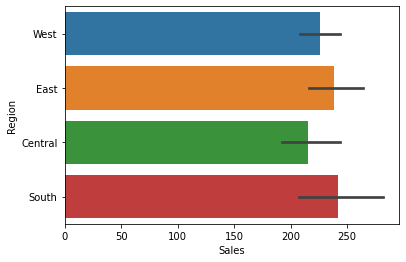

In [10]:
sns.barplot(x="Sales", y="Region", data=df)

<AxesSubplot:xlabel='Region', ylabel='Sales'>

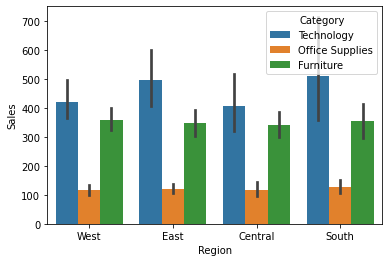

In [11]:
sns.barplot(x="Region", y="Sales", data=df, hue="Category")

In [12]:
df=df[df["Category"]=="Office Supplies"]
# sns.barplot(x="Category", y="Sales", data=West, hue="Sub-Category")
# df.groupby(["Category","Sub-Category"])[["Category", "Sub-Category"]].mean()


In [13]:
df.pivot_table(values="Sales", index="Region", columns="Sub-Category", fill_value=0, margins=True , aggfunc=np.mean)

Sub-Category,Appliances,Art,Binders,Envelopes,Fasteners,Labels,Paper,Storage,Supplies,All
Region,,,,,,,,,,
Central,191.723846,32.757614,155.528093,78.591051,14.146000,32.256211,54.491907,218.714819,262.982556,117.458801
East,271.337032,32.832298,121.586357,59.133432,13.438000,24.326486,53.366672,295.919769,192.144929,120.044425
South,241.053407,32.786070,150.529841,61.954741,17.355724,36.202769,64.031602,279.437969,286.859586,126.282727
West,222.326000,36.848264,118.813403,61.464179,12.822444,43.782121,59.252707,265.161098,262.711913,116.422377
All,230.755710,34.068834,133.560560,64.867724,13.936774,34.303055,57.284092,264.590553,245.650200,119.324101


In [27]:
df.pop("Category")
df.rename(columns= {"Sub-Category":"Category"}, inplace=True)
df.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Supplies,Staple remover,25.760,7,0.0,NaN
5,CA-2016-139808,2016-10-07,Standard Class,West,OFF-FA-10001883,Fasteners,"Alliance Super-Size Bands, Assorted Sizes",93.360,12,0.0,NaN
6,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-ST-10002756,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",541.240,4,0.0,NaN
7,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-PA-10000474,Paper,Easy-staple paper,106.320,3,0.0,NaN
9,CA-2014-127859,2014-03-17,Second Class,East,OFF-PA-10003641,Paper,Xerox 1909,126.624,6,0.2,NaN


In [29]:
import plotly.express as px

fig = px.bar(df, x='Region', y='Sales',
             hover_data=['Sales'], color='Category',
             title="Sales of sub-categories of Office Supplies in each Region", height=400, barmode='stack')
fig.show()

# sns.barplot(x="Region", y="Sales", data=df, hue="Sub-Category")
# plt.show()

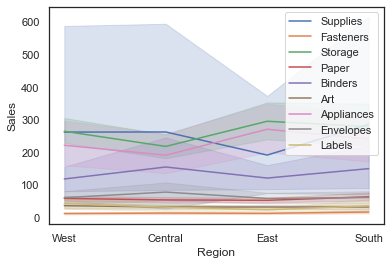

In [37]:
ax=sns.lineplot(x="Region", y="Sales", data=df, hue="Category")
ax.legend(loc='upper right')

In [15]:
import plotly.express as px
new_df = df['Sub-Category'].value_counts().sort_values(ascending=True)
# print(number_of_apps_in_category)
fig = px.pie(df, values=new_df.values, names=new_df.index, 
             title='Share of Office-Supplies categories in market')
fig.show()


In [39]:
df.describe()

,Sales,Quantity,Discount,Profit
count,6026.000000,6026.000000,6026.000000,4840.000000
mean,119.324101,3.801195,0.157285,19.992321
std,382.182228,2.218513,0.229495,148.781017
min,0.444000,1.000000,0.000000,-2929.484500
25%,11.760000,2.000000,0.000000,2.189700
50%,27.418000,3.000000,0.000000,7.021800
75%,79.920000,5.000000,0.200000,19.465600
max,9892.740000,14.000000,0.800000,4630.475500


In [40]:
df

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Supplies,Staple remover,25.760,7,0.0,NaN
5,CA-2016-139808,2016-10-07,Standard Class,West,OFF-FA-10001883,Fasteners,"Alliance Super-Size Bands, Assorted Sizes",93.360,12,0.0,NaN
6,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-ST-10002756,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",541.240,4,0.0,NaN
7,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-PA-10000474,Paper,Easy-staple paper,106.320,3,0.0,NaN
9,CA-2014-127859,2014-03-17,Second Class,East,OFF-PA-10003641,Paper,Xerox 1909,126.624,6,0.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9982,US-2016-117793,2016-08-23,Standard Class,Central,OFF-ST-10002406,Storage,Pizazz Global Quick File,14.970,1,0.0,4.1916
9984,CA-2016-133872,2016-06-14,First Class,South,OFF-BI-10002082,Binders,GBC Twin Loop Wire Binding Elements,39.936,4,0.7,-26.6240
9986,US-2015-165743,2015-11-20,Second Class,West,OFF-BI-10001982,Binders,Wilson Jones Custom Binder Spines & Labels,4.896,3,0.7,-3.4272
9988,US-2015-165743,2015-11-20,Second Class,West,OFF-BI-10001758,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.7,-7.3692


In [53]:
df.groupby("Category")["Sales"].sum().sort_values()

Category
Fasteners       3024.280
Labels         12486.312
Envelopes      16476.402
Art            27118.792
Supplies       46673.538
Paper          78479.206
Appliances    107532.161
Binders       203412.733
Storage       223843.608
Name: Sales, dtype: float64

In [50]:
profits=df.groupby("Category")["Profit"].sum()
profits.sort_values(ascending=False)

Category
Paper         27916.9717
Binders       20775.3364
Storage       17622.5872
Appliances    14819.7536
Envelopes      6119.9244
Art            5243.7949
Labels         4685.5425
Fasteners       818.5984
Supplies      -1239.6738
Name: Profit, dtype: float64

In [54]:
import plotly.express as px
# print(number_of_apps_in_category)
fig = px.pie(profits, values=profits.values, names=profits.index, 
             title='Profit Share of Office-Supplies categories in market')
fig.show()


In [58]:
# df["Month"]=df["Order Date"].dt.month
df.head(3)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Month
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Supplies,Staple remover,25.76,7,0.0,NaN,12
5,CA-2016-139808,2016-10-07,Standard Class,West,OFF-FA-10001883,Fasteners,"Alliance Super-Size Bands, Assorted Sizes",93.36,12,0.0,NaN,10
6,CA-2015-110863,2015-11-17,Standard Class,Central,OFF-ST-10002756,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",541.24,4,0.0,NaN,11


In [61]:
# import plotly.express as px

# fig = px.bar(df, x='Month', y='Profit',
#              hover_data=['Profit'], color='Region',
#              title="Sales of sub-categories of Office Supplies in each Region", height=400, barmode='stack')
# fig.show()

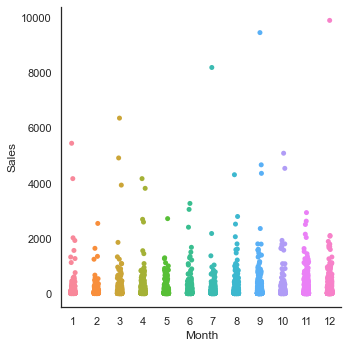

In [72]:
sns.catplot(x="Month", y="Sales", data=df)  #categorical plots

In [70]:
df.pop("Order ID")
df.pop("Product ID")
df.tail(3)

,Order Date,Ship Mode,Region,Category,Product Name,Sales,Quantity,Discount,Profit,Month
9986,2015-11-20,Second Class,West,Binders,Wilson Jones Custom Binder Spines & Labels,4.896,3,0.7,-3.4272,11
9988,2015-11-20,Second Class,West,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.7,-7.3692,11
9992,2014-05-04,First Class,West,Appliances,Holmes Odor Grabber,57.680,4,0.0,19.0344,5


<AxesSubplot:xlabel='Year', ylabel='Profit'>

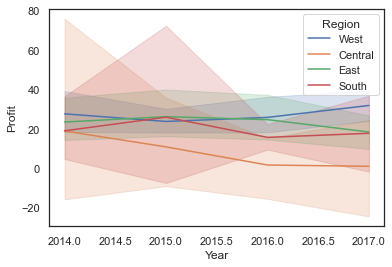

In [82]:
# df["Year"]=df["Order Date"].dt.year
sns.lineplot(x="Year", y="Profit", hue="Region", data=df)

In [85]:
g=df.groupby(["Year", "Region"])["Profit"].sum()
g.values

array([ 4205.1865,  5920.7381,  3319.0124,  8460.9043,  2173.662 ,
        7655.4167,  4397.0758,  7346.7997,   464.858 ,  9453.2546,
        3346.2647, 10354.4753,   396.588 ,  7983.9266,  4301.6619,
       16983.0107])

In [86]:
df_linechart = pd.DataFrame({'Year': [2014,2014,2014,2014, 2015,2015,2015,2015, 2016,2016,2016,2016, 2017,2017,2017,2017],
                   'Region': ['Central', 'East', 'South', 'West', 'Central', 'East', 'South', 'West', 'Central', 'East', 'South', 'West','Central', 'East', 'South', 'West'],
                   'Profit': [ 4205.1865,  5920.7381,  3319.0124,  8460.9043,  2173.662 ,
        7655.4167,  4397.0758,  7346.7997,   464.858 ,  9453.2546,
        3346.2647, 10354.4753,   396.588 ,  7983.9266,  4301.6619,
       16983.0107]})

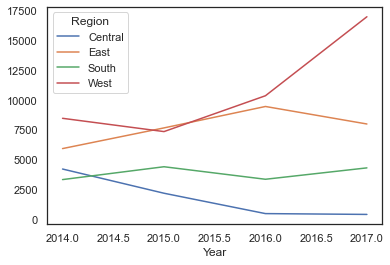

In [103]:
pd.pivot_table(df_linechart,
               index='Year', columns='Region', values='Profit'
              ).plot()
# ax.set_ylabel('Profit') 
# ax.set_title('Profits by Year')
plt.show()

In [104]:
df[df["Category"]=="Storage"]

,Order Date,Ship Mode,Region,Category,Product Name,Sales,Quantity,Discount,Profit,Month
Year,,,,,,,,,,
2015,2015-11-17,Standard Class,Central,Storage,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",541.240,4,0.0,NaN,11
2015,2015-09-11,Second Class,East,Storage,Space Solutions Industrial Galvanized Steel Sh...,78.800,1,0.0,NaN,9
2015,2015-09-11,Second Class,East,Storage,Fellowes Staxonsteel Drawer Files,772.680,4,0.0,NaN,9
2017,2017-08-21,Second Class,West,Storage,Fellowes Stor/Drawer Steel Plus Storage Drawers,572.580,6,0.0,NaN,8
2015,2015-08-28,Standard Class,West,Storage,"Hot File 7-Pocket, Floor Stand",892.350,5,0.0,NaN,8
...,...,...,...,...,...,...,...,...,...,...
2016,2016-12-14,First Class,West,Storage,Tenex Personal Project File with Scoop Front D...,134.800,10,0.0,35.0480,12
2014,2014-03-01,Standard Class,Central,Storage,Fellowes Bankers Box Recycled Super Stor/Drawer,129.552,3,0.2,-22.6716,3
2014,2014-04-01,Standard Class,East,Storage,Rogers Profile Extra Capacity Storage Tub,66.960,4,0.0,2.6784,4
